In [9]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from PIL import Image
from scipy.spatial import distance
from operator import itemgetter
from sklearn.neighbors import KDTree
import time
import imageio
import os
import glob

In [86]:
UNDEFINED = 0
NOISE = 1
EPS =  1.75     # 0.9 1.75
RADIUS = 1
TRESHOLD = 4*RADIUS       # (8*EPS)/2

In [140]:
class DBScan():
    def __init__(self, mat):
        self.mat = mat
        self.r = RADIUS
        self.e = EPS
        self.t = TRESHOLD
    
    def query_radius(self, i, j):
        result = []
        tup = self.mat.shape
        coords = list(range(-self.r, self.r + 1))
        cont = 0
        for x in coords:
            for y in coords:
                if x == i and y == j:
                    continue
                curr_i, curr_j = (i + x, j + y)
                # print(f'({curr_i}, {curr_j})', end=" -> ")
                if 0 <= curr_i < tup[0] and 0 <= curr_j < tup[1]:
                    result.append(list(self.mat[curr_i, curr_j]))
                else: 
                    continue
                # print(f'({x}, {y})', end="\t")
                cont += 1
            # print()
        # print(f'\n{cont}')
        return result

    def run(self):
        tup = self.mat.shape        # x, y, z
        c = 1
        for i in range(tup[0]):        # 60, 
            for j in range(tup[1]):    # 60, 
                # print(f'current : {self.mat[i, j]}')
                if (self.query_radius(i, j) != [coord for coord in self.query_radius(i, j) if distance.euclidean(self.mat[i, j], coord) < EPS]):
                    print(self.query_radius(i, j))
                    print('\t',[coord for coord in self.query_radius(i, j) if distance.euclidean(self.mat[i, j], coord) < EPS])
            #     break
            # break

In [141]:
IMG_PATH = './mini_data/'

# **SIMULACIÓN**

0.jpg


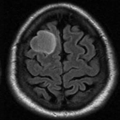

(120, 120, 3)

[[7, 7, 7], [7, 7, 7], [5, 5, 5], [7, 7, 7], [7, 7, 7], [6, 6, 6]]
	 [[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7]]
[[7, 7, 7], [5, 5, 5], [3, 3, 3], [7, 7, 7], [6, 6, 6], [4, 4, 4]]
	 [[5, 5, 5]]
[[5, 5, 5], [3, 3, 3], [3, 3, 3], [6, 6, 6], [4, 4, 4], [5, 5, 5]]
	 [[3, 3, 3], [3, 3, 3]]
[[3, 3, 3], [3, 3, 3], [4, 4, 4], [4, 4, 4], [5, 5, 5], [4, 4, 4]]
	 [[3, 3, 3], [3, 3, 3]]
[[3, 3, 3], [4, 4, 4], [4, 4, 4], [5, 5, 5], [4, 4, 4], [2, 2, 2]]
	 [[4, 4, 4], [4, 4, 4], [4, 4, 4]]
[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], [2, 2, 2], [2, 2, 2]]
	 [[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4]]
[[4, 4, 4], [4, 4, 4], [4, 4, 4], [2, 2, 2], [2, 2, 2], [3, 3, 3]]
	 [[4, 4, 4], [4, 4, 4], [4, 4, 4]]
[[4, 4, 4], [4, 4, 4], [5, 5, 5], [2, 2, 2], [3, 3, 3], [4, 4, 4]]
	 [[4, 4, 4], [4, 4, 4], [4, 4, 4]]
[[4, 4, 4], [5, 5, 5], [5, 5, 5], [3, 3, 3], [4, 4, 4], [5, 5, 5]]
	 [[5, 5, 5], [5, 5, 5], [5, 5, 5]]
[[5, 5, 5], [5, 5, 5], [3, 3, 3], [4, 4, 4], [5, 5, 5], [5, 5, 5]]
	 [[5, 5, 5], [5, 5, 5], [5,

In [142]:
for im in os.listdir(IMG_PATH):
    print(im)
    img = Image.open(IMG_PATH + im).resize((120, 120))#.convert('1')
    display(img)
    mat = np.asarray(img).astype(int)
    display(mat.shape)
    # display(mat)
    dbs = DBScan(mat)
    dbs.run()
    break
